In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [10]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  

In [42]:
df.to_csv("california_houses_dataset.csv",index_label=False)

In [44]:
df= pd.read_csv("california_houses_dataset.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [45]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
X=df.drop("MedHouseVal",axis=1)
y=df["MedHouseVal"]

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implementing Ridge Regression

In [49]:
ridge = Ridge()

ridge.fit(X_train_scaled,y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

In [50]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")

Ridge Regression - MSE: 0.56, R²: 0.58


### Hyperparameter Tuning with Cross-Validation1

In [51]:
alpha_values = np.logspace(-3, 3, 100)

ridge =Ridge()

ridge_cv =GridSearchCV(ridge,cv=5,param_grid={'alpha': alpha_values},scoring='neg_mean_squared_error')


ridge_cv.fit(X_train_scaled, y_train)

best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha_ridge}")


Best alpha for Ridge Regression: 0.11497569953977356


### Training Ridge Regression with Best Alpha

In [52]:
ridge_best = Ridge(alpha=best_alpha_ridge)

ridge_best.fit(X_train_scaled, y_train)

y_pred_ridge_best = ridge_best.predict(X_test_scaled)

mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)

print(f"Ridge Regression (Best Alpha) - MSE: {mse_ridge_best:.2f}, R²: {r2_ridge_best:.2f}")

Ridge Regression (Best Alpha) - MSE: 0.56, R²: 0.58


### Implementing Lasso Regression

In [53]:
lasso = Lasso()

lasso.fit(X_train_scaled, y_train)


y_pred_lasso = lasso.predict(X_test_scaled)

In [54]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}")

Lasso Regression - MSE: 1.31, R²: -0.00


### Hyperparameter Tuning with Cross-Validation

In [ ]:
alpha_values = np.logspace(-3, 1, 100)

lasso = Lasso(max_iter=10000)

lasso_cv = GridSearchCV(
    lasso, 
    param_grid={'alpha': alpha_values}, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

lasso_cv.fit(X_train_scaled, y_train)

# Best alpha
best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f"Best alpha for Lasso Regression: {best_alpha_lasso}")


### Training Lasso Regression with Best Alpha11

In [34]:
lasso_best = Lasso(alpha=best_alpha_lasso, max_iter=10000)

# Train the model
lasso_best.fit(X_train_scaled, y_train)

y_pred_lasso_best = lasso_best.predict(X_test_scaled)

mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)

print(f"Lasso Regression (Best Alpha) - MSE: {mse_lasso_best:.2f}, R²: {r2_lasso_best:.2f}")


Lasso Regression (Best Alpha) - MSE: 0.55, R²: 0.58


### Feature Selection with Lasso

-  One of the key benefits of Lasso is its ability to perform feature selection by shrinking some coefficients to zero.

In [35]:
# Coefficients of Lasso model
coefficients = pd.Series(lasso_best.coef_, index=X.columns)

# Display non-zero coefficients
print("Lasso Regression Coefficients:")
print(coefficients[coefficients != 0].sort_values(ascending=False))

Lasso Regression Coefficients:
MedInc        0.849140
AveBedrms     0.326050
HouseAge      0.123346
Population   -0.001062
AveOccup     -0.039890
AveRooms     -0.281273
Longitude    -0.858093
Latitude     -0.885822
dtype: float64


### Visualizing the Results

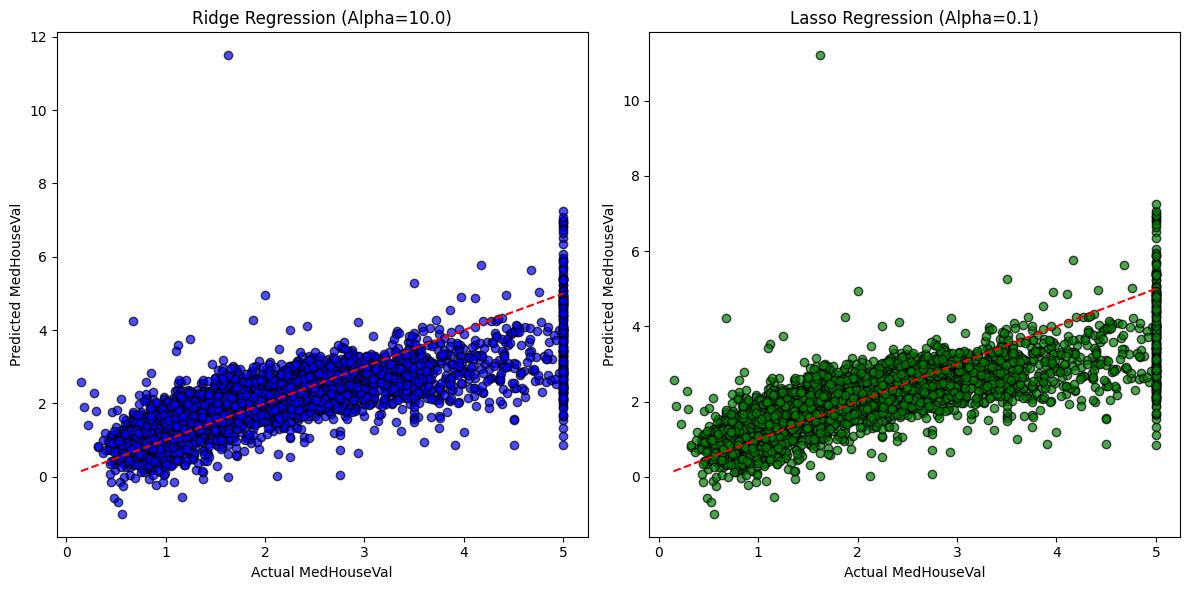

In [36]:
plt.figure(figsize=(12, 6))

# Ridge Regression (Best Alpha)
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge_best, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Ridge Regression (Alpha=10.0)')

# Lasso Regression (Best Alpha)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso_best, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Lasso Regression (Alpha=0.1)')

plt.tight_layout()
plt.show()

### Coefficient Paths

- Visualizing how coefficients change with different regularization strengths can provide insights into the feature selection process
- Interpretation:

    - As alpha increases, more coefficients are shrunk towards zero.
    - Some features are entirely removed (coefficients set to zero) at higher alpha values, demonstrating Lasso's feature selection capability.

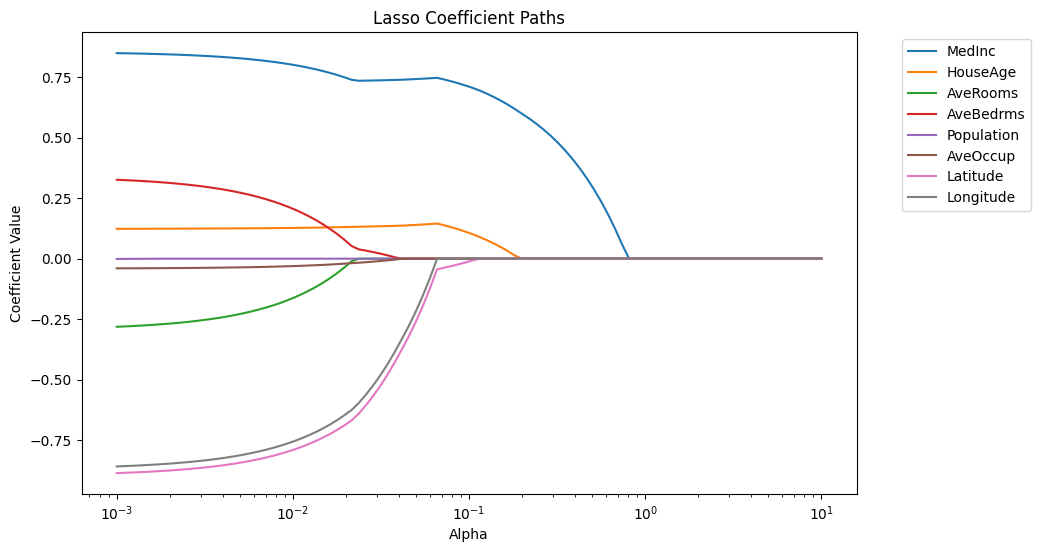

In [37]:
# Define a range of alpha values for plotting coefficient paths
alphas = np.logspace(-3, 1, 100)
coefs = []

# Initialize Lasso
lasso = Lasso(max_iter=10000)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

# Plot coefficient paths
plt.figure(figsize=(10, 6))
ax = plt.gca()

for i in range(coefs[0].shape[0]):
    ax.plot(alphas, [coef[i] for coef in coefs], label=X.columns[i])

ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficient Paths')
plt.axis('tight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()